In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Activation, Dense, Lambda,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


Using TensorFlow backend.


In [3]:
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dir = 'dataset/training_set/'
validation_dir = 'dataset/test_set/'
test_dir = 'dataset/test_set/'

In [5]:
image_w = 128
image_h = 128

In [6]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [7]:
validation_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [8]:
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [9]:
def LeNet(width, height, channels, output):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels)))
    
#     model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels))

    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2)))
    
    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    model.add(Activation('softmax'))
    
    return model

In [10]:
train_generator.samples

8000

In [11]:
EPOCHS = 20
train_sample = train_generator.samples
validation_sample = validation_generator.samples
test_sample = test_generator.samples

In [12]:
model = LeNet(image_w, image_h, 3, 2)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [14]:
batch_size = train_generator.batch_size

In [15]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])

In [16]:
history = model.fit_generator(train_generator,
                   steps_per_epoch = train_sample//batch_size,
                   epochs = EPOCHS,
                   validation_data = validation_generator,
                   validation_steps = validation_sample//batch_size)

Epoch 1/20
250/250 [==============================] - 108s 433ms/step - loss: 0.2416 - acc: 0.5639 - val_loss: 0.2202 - val_acc: 0.6401
Epoch 2/20
250/250 [==============================] - 104s 414ms/step - loss: 0.2140 - acc: 0.6641 - val_loss: 0.2004 - val_acc: 0.7152
Epoch 3/20
250/250 [==============================] - 105s 421ms/step - loss: 0.1943 - acc: 0.7053 - val_loss: 0.1764 - val_acc: 0.7475
Epoch 4/20
250/250 [==============================] - 105s 419ms/step - loss: 0.1729 - acc: 0.7441 - val_loss: 0.1749 - val_acc: 0.7510
Epoch 5/20
250/250 [==============================] - 104s 417ms/step - loss: 0.1531 - acc: 0.7809 - val_loss: 0.2035 - val_acc: 0.7036
Epoch 6/20
250/250 [==============================] - 105s 420ms/step - loss: 0.1411 - acc: 0.7989 - val_loss: 0.1852 - val_acc: 0.7208
Epoch 7/20
250/250 [==============================] - 105s 418ms/step - loss: 0.1224 - acc: 0.8304 - val_loss: 0.1678 - val_acc: 0.7626
Epoch 8/20
250/250 [============================

In [17]:
ls

CatDog.ipynb  dataset/      model.h5


In [18]:
model.save_weights('model.h5')

In [19]:
ls

CatDog.ipynb  dataset/      model.h5


In [20]:
model.load_weights('model.h5')

In [21]:
%matplotlib inline

In [22]:
img = load_img('dataset/training_set/cats/cat.1000.jpg', target_size=(image_w, image_h))

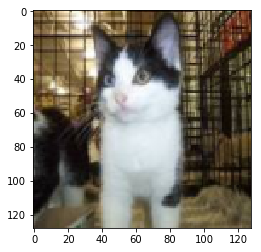

In [23]:
plt.imshow(img)

In [24]:
img = np.array(img)/255

In [25]:
img.shape

(128, 128, 3)

In [26]:
img = np.expand_dims(img, axis = 0)

In [27]:
img.shape

(1, 128, 128, 3)

In [28]:
model.predict(img)

array([[  9.99683857e-01,   3.16202902e-04]], dtype=float32)

In [29]:
cat = {0, 1}
dog = {1, 0}